# Movie-Recommendation using Auto-Encoders

The project is based on building a recommendation system using Auto-Encoders. Although generic recommendation system have been around for quite sometime now, using auto-encoders for recommendation system is a novel idea. Since every user does not watch or rate every movie, there are a lot of missing data points in these massive datasets which makes them quite sparse. Datasets with 10k movies  on an average have 50-300 ratings per user. This makes it really difficult to use generic models.
 
 On the other-hand, auto-encoders learn the representation of the input data and try to regenerate the same as the output. As there are a lot of missing input values (0 rating), the auto-encoder anticipates and generates a rating for those movies which the user hasn't seen. This is based on collaborative filtering where the similarity between different users is extrapolated and shared betwen each other. 


#### Approaches

Mass customization is becoming more and more popular. Recommendation systems are built on 2 main approaches.

__Content-based filtering__, makes recommendations based on user preferences for product features. 

__Collaborative filtering__ mimics user-to-user recommendations. It predicts users preferences as a linear, weighted combination of other user preferences.


# Brief Description about the project

__Data Preprocessing__ - For the scope of this project, MovieLens 1Million dataset is used which is a very popular dataset choice for building recommendation systems. The dataset contains a collection of ratings from 6040 users across 3706 movies. The rating are on a scale of 0-5. Data-preprocessing is performed to get insights regarding the users, movies, or ratings in general.

__Developing the Model__ - Different Autoencoder models are developed and trained with different choice of activation functions. TanH, Sigmoid, Linear are some of the activation functions that the model is trained upon. 

__Training and Evaluating__ - The model is trained for 200 epochs, and the training process is evaluated using 3 different metrics. The metrics considered are RMSE (Root Mean Square Error), MAE (Mean Absolue Error), and NDCG (Normalized Discounted Cumulative Gain).

__Comparison against the Spark Model__ - The developed model is trained and compared against the Spark ALS model. Since the spark ALS model is trained on a dataset of 20 Million datapoints, it has better performance when compared against the model with 1Million datapoints.




In [0]:
import numpy as np
import pandas as pd
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale=1.5)
%matplotlib inline

#### Pre-processing the Ratings Dataset for Training

In [0]:
# Read and Pre-process the Ratings.dat 

root_path = 'Z:/ml-1m/' # Root Directory containing all the different files

ratings = pd.read_csv(root_path +"ratings.dat",sep='::',header = None,engine='python',encoding = 'latin-1')
ratings = ratings.rename(columns = {0:'userId',1:'movieId',2:'ratings',3:'timestamp'})
ratings['timestamp'] = ratings['timestamp'].apply(lambda x: time.strftime('%Y', time.localtime(x)))
ratings.head()

,userId,movieId,ratings,timestamp
0,1,1193,5,2000
1,1,661,3,2000
2,1,914,3,2000
3,1,3408,4,2000
4,1,2355,5,2001


In [0]:
# Delete the Timestamp column
del ratings['timestamp']

In [0]:
# Finding the total numbers of users, and list of movie Ids sequence for mapping

n_users =  ratings['userId'].nunique()
n_movies = ratings['movieId'].unique()

print('Total number of users -', n_users)
print('Total numbers of movies -', len(n_movies))

Total number of users - 6040
Total numbers of movies - 3706


In [0]:
# Find missing movieIds in the dataset

sortedMovieIds = np.sort(n_movies)

def find_missing(lst): 
    start = lst[0] 
    end = lst[-1] 
    return sorted(set(range(start, end + 1)).difference(lst)) 

missingValues = find_missing(sortedMovieIds)
print('Missing Movie Ids - ',missingValues, '\n')
print('Number of Movie IDs missing -', len(missingValues))


Missing Movie Ids -  [51, 91, 109, 115, 143, 221, 284, 285, 323, 395, 399, 400, 403, 604, 620, 622, 625, 629, 636, 646, 654, 675, 676, 677, 683, 686, 689, 693, 699, 713, 721, 723, 727, 738, 739, 740, 752, 768, 770, 772, 773, 777, 794, 795, 797, 812, 816, 817, 819, 822, 825, 845, 855, 856, 857, 871, 873, 883, 890, 894, 979, 983, 995, 1001, 1045, 1048, 1052, 1065, 1072, 1074, 1075, 1106, 1108, 1109, 1110, 1122, 1137, 1140, 1141, 1143, 1146, 1155, 1156, 1157, 1158, 1159, 1166, 1182, 1195, 1229, 1239, 1308, 1309, 1314, 1318, 1319, 1338, 1368, 1400, 1402, 1403, 1418, 1424, 1435, 1443, 1448, 1451, 1452, 1462, 1467, 1469, 1478, 1481, 1491, 1492, 1505, 1506, 1512, 1521, 1524, 1530, 1536, 1540, 1557, 1559, 1560, 1568, 1576, 1577, 1578, 1607, 1618, 1628, 1634, 1637, 1638, 1691, 1697, 1698, 1700, 1705, 1706, 1708, 1710, 1712, 1716, 1723, 1736, 1737, 1738, 1740, 1742, 1745, 1751, 1757, 1761, 1763, 1765, 1766, 1768, 1774, 1775, 1776, 1778, 1781, 1786, 1789, 1790, 1800, 1802, 1803, 1808, 1813, 1818,

In [0]:
# Initializing a numpy array 

dataset = np.zeros((n_users,len(n_movies)))
dataset.shape

(6040, 3706)

In [0]:
# Mappings rows(users) to columns(movies)

for i in range(ratings.shape[0]):
    user = ratings.iloc[i][0]
    movieNumber = ratings.iloc[i][1]
    rating = ratings.iloc[i][2]
    
    movie = np.where(n_movies == movieNumber)
    
    dataset[int(user) - 1,movie] = rating

In [0]:
# Saving the dataset and the movieId using .npy format

np.save('dataset.npy',dataset)
np.save('movieId.npy',n_movies)

#### Insights on MovieLens Dataset - Ratings, Movies, Users

In [0]:
# Read Ratings, movies, and users dat files

ratings = pd.read_csv(root_path + "ratings.dat",sep='::',header = None,engine='python',encoding = 'latin-1')
ratings = ratings.rename(columns = {0:'userId',1:'movieId',2:'ratings',3:'timestamp'})
ratings['timestamp'] = ratings['timestamp'].apply(lambda x: time.strftime('%Y', time.localtime(x)))
    
movies = pd.read_csv(root_path + "movies.dat",sep='::',header = None,engine='python',encoding = 'latin-1')    
movies = movies.rename(columns = {0:'movieId',1:'title',2:'genre'})

users = pd.read_csv(root_path + "users.dat",sep='::',header = None,engine='python',encoding = 'latin-1')  
users = users.rename(columns = {0:'userId',1:'gender',2:'age',3:'occupation',4:'zipcode'})

In [0]:
# Merge the 3 datasets and print top 10 values

data = pd.merge(pd.merge(ratings, users), movies)
data.head()

,userId,movieId,ratings,timestamp,gender,age,occupation,zipcode,title,genre
0,1,1193,5,2000,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,2000,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,2000,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,2000,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,2000,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [0]:
# Average Ratings given by Females and Males

avg_ratings = data.pivot_table('ratings', index='title',
                               columns='gender', aggfunc='mean')
avg_ratings.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [0]:
# Average age of the users

avg_ages = data.pivot_table('age', index='title', 
                             columns='gender', aggfunc='mean')
avg_ages.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",34.875000,28.333333
'Night Mother (1986),30.888889,35.794118
'Til There Was You (1997),28.135135,30.533333
"'burbs, The (1989)",27.500000,28.071090
...And Justice for All (1979),38.228571,35.506098


In [0]:
# Number of ratings/movie

ratings_per_title = data.groupby('title').size()
ratings_per_title.head()

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

Text(0.5, 1.0, 'Distribution of Ratings')

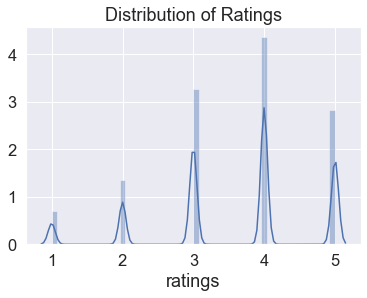

In [0]:
# Display distribution of ratings, given by users
sns.distplot(ratings['ratings'].fillna(ratings['ratings'].median())).set_title('Distribution of Ratings')

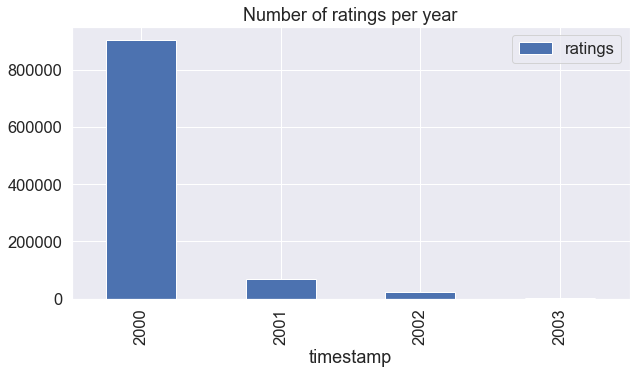

In [0]:

# Number of ratings/year. Most ratings are available for the year 2000(equivalent to around 90% of the data points).
Now have a look at the average monthly distribution of rating.
ratings[['timestamp', 'ratings']].groupby(['timestamp']).count().reset_index().plot.bar(x='timestamp', y='ratings', title='Number of ratings per year', figsize=(10, 5));

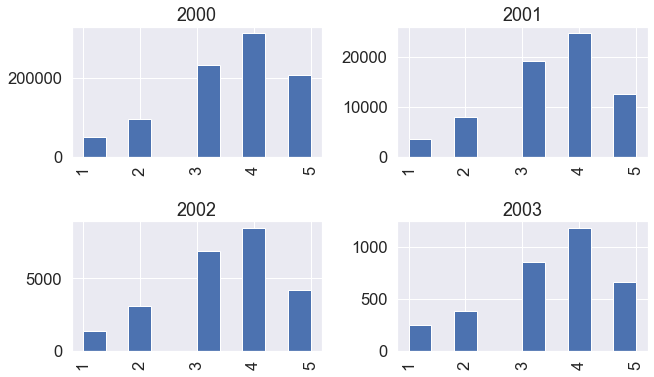

In [0]:
ratings['ratings'].hist(by=ratings['timestamp'], figsize=(10, 6));

In [0]:
# Unique genres in the movie dataset

genres_unique = pd.DataFrame(movies.genre.str.split('|').tolist()).stack()
print('Unique Genres -->', set(genres_unique))

Unique Genres --> {'Romance', 'Sci-Fi', 'Comedy', 'Animation', 'Horror', 'Western', 'War', 'Documentary', 'Musical', "Children's", 'Drama', 'Action', 'Mystery', 'Adventure', 'Film-Noir', 'Thriller', 'Fantasy', 'Crime'}


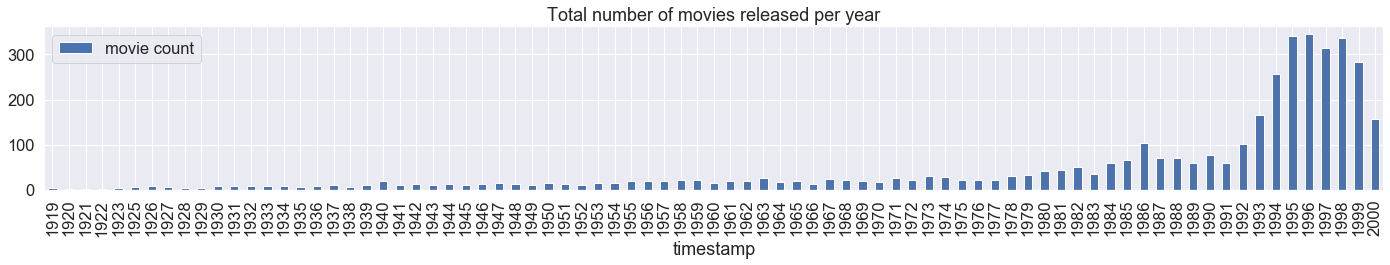

In [0]:
# Total number of movies released/year

movies['timestamp'] = movies.title.str.extract("\((\d{4})\)", expand=True).astype(str)
movie_count = movies[['timestamp', 'movieId']].groupby(['timestamp']).count().reset_index().rename(columns={'movieId':'movie count'})
movie_count.plot.bar('timestamp', 'movie count', title='Total number of movies released per year', figsize=(24, 3));